In [18]:
from IPython.display import Video
Video('data/17-017.mp4')

In [11]:
!pip install scikit-image

     |████████████████████████████████| 13.5 MB 10.0 MB/s eta 0:00:01
     |████████████████████████████████| 6.4 MB 29.1 MB/s eta 0:00:01
     |████████████████████████████████| 178 kB 43.2 MB/s eta 0:00:01
     |████████████████████████████████| 1.9 MB 29.1 MB/s eta 0:00:01
     |████████████████████████████████| 313 kB 43.6 MB/s eta 0:00:01
     |████████████████████████████████| 3.3 MB 29.7 MB/s eta 0:00:01
  Attempting uninstall: pillow
    Found existing installation: Pillow 8.2.0
    Uninstalling Pillow-8.2.0:
      Successfully uninstalled Pillow-8.2.0


In [ ]:
# first_frame = video_reader[0]
# middle_frame = video_reader[int((len(video_reader) - 1) / 2)]
# last_frame = video_reader[len(video_reader) - 1]

def get_points(frame):
  h = frame.shape[0]
  w = frame.shape[1]
 
  patch1 = frame[0:50,0:50,:]
  patch2 = frame[0:50,w-50:w,:]
  patch3 = frame[h-50:h,0:50,:]
  patch4 = frame[h-50:h,w-50:w,:]
  return (patch1, patch2, patch3, patch4)

In [7]:
import matplotlib.pyplot as plt

def print_img(frame):
  fig = plt.figure()
  ax = fig.add_subplot()
  ax.imshow(frame)
  ax.axis("off")
  plt.show()

In [57]:
def to_boolean(arr):
    return np.where(arr == 0, False, True)

def to_bin(arr):
    return np.where(arr == False, 0, 255)

In [38]:
import mmcv
import numpy as np
import cv2

video_reader = mmcv.VideoReader('data/17-017.mp4')

fourcc = cv2.VideoWriter_fourcc(*'mp4v')
video_writer = cv2.VideoWriter('data/out-17-017.mp4', fourcc, video_reader.fps,(video_reader.width, video_reader.height))


In [39]:
import skimage

# a = get_points(first_frame)[0]
# b = get_points(last_frame)[0]
# a = first_frame
# b = last_frame

mask = video_reader.read()

for i, frame in enumerate(video_reader):
    if i == 0:
        continue
    else:
        b = frame
        color_diff = skimage.color.deltaE_ciede2000(mask, b)
        np.putmask(mask[:, :, 0], color_diff > 5, 0)
        np.putmask(mask[:, :, 1], color_diff > 5, 0)
        np.putmask(mask[:, :, 2], color_diff > 5, 0)

TypeError: Image data of dtype object cannot be converted to float

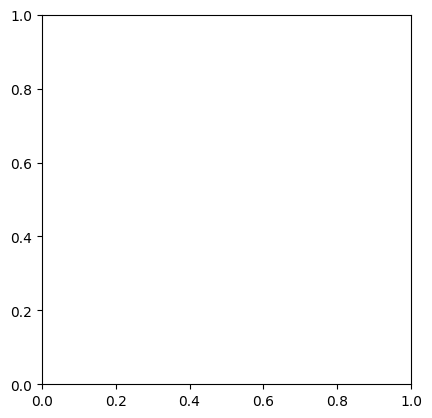

In [100]:
frame = video_reader.read()

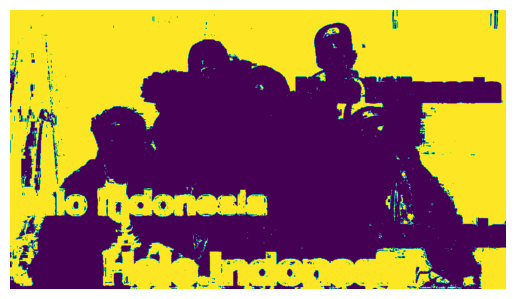

In [44]:
mask_cp = np.copy(mask)

# gray_img = cv2.cvtColor(inverted, cv2.COLOR_RGB2GRAY)
# ret, bin_img = cv2.threshold(gray_img ,1, 1, cv2.THRESH_BINARY_INV)
inverted_bin = np.where(bin_img == 0, 255, 0)
print_img(inverted_bin)

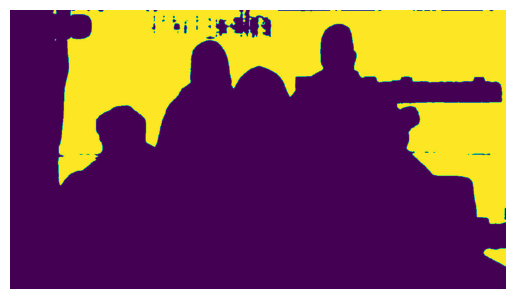

In [47]:
from PIL import Image
import numpy as np

mask_img = Image.open("data/mask.jpg")
mask = np.array(mask_img)
print_img(mask)

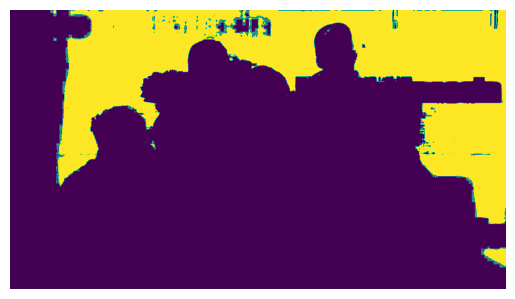

In [63]:
cross = to_bin(to_boolean(mask) * to_boolean(inverted_bin))
print_img(cross)

In [71]:
len(cross[0])

1280

In [89]:
from typing import List, Tuple

import matplotlib.patches as patches
import numpy as np
from PIL import Image


def add_bboxes_to_image(ax, image: np.ndarray,
                        bboxes: List[Tuple[int, int, int, int]],
                        labels: List[str] = None,
                        label_size: int = 10,
                        line_width: int = 2,
                        border_color=(0, 1, 0, 1)) -> None:
    """
    Add bbox to ax

    :param image: dtype=np.uint8
    :param bbox: [(left, top, right, bottom)]
    :param label: List[str] or None
    :return: ax
    """
    # Display the image
    ax.imshow(image)

    if labels is None:
        labels = [None] * len(bboxes)

    for bbox, label in zip(bboxes, labels):
        # Add bounding box
        top, left, bottom, right = bbox
        rect = patches.Rectangle((left, top), right - left, bottom - top,
                                 linewidth=line_width,
                                 edgecolor=border_color,
                                 facecolor='none')
        ax.add_patch(rect)

        # label
        if label:
            bbox_props = dict(boxstyle="square,pad=0",
                              linewidth=line_width, facecolor=border_color,
                              edgecolor=border_color)
            ax.text(left, top, label,
                    ha="left", va="bottom", rotation=0,
                    size=label_size, bbox=bbox_props)
    return ax

1.5268920068027212


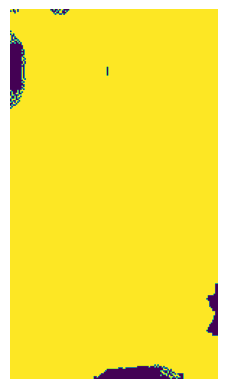

In [92]:
# 256 144
# 224 126

print(np.mean(cross[0:224, 0:126]))
print_img(cross[0:256, 200:344])

output = []
max = 0
res = (0, 0)
for i in range(1280):
    for j in range(720):
        mean = np.mean(cross[i:i+224, j:j+126])
        if mean > 254:
            output.append((i, i+224, j, j+126))

<AxesSubplot:>

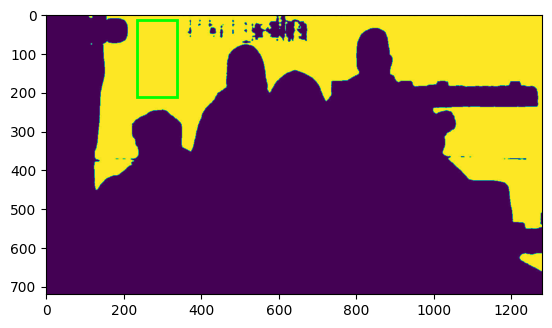

In [96]:
import random

result = [random.choice(output)]

# image = np.array(Image.open('chick.jpg'))
# bboxes = [(20, 130, 280, 280), (0, 0, 100, 100)]
fig, ax = plt.subplots()
add_bboxes_to_image(ax, np.uint8(mask), result)